# Expectation-Maximization Algorithm in 1D Gaussian mixture

Gaussian mixtures are interesting models for clustering, when we have a lot of overlapping between distinct groups of data, or non-spherical clusters (when centroids tend to be more effective). Other advantage of this technique of probability estimation is the possibility of "soft assignment" of clusters, respecting probabilities of being from one or other group.  This is specially interesting when we have a "human in the loop", and the provided likelihood from this model can tool to suport her decisionmaking.

![alt text](em_alg.png) 

(Reference: Elements of Statistical Learning)

In [96]:
# Load packages:

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import seaborn as sns

np.random.seed(0)

/Users/marcelotournier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/marcelotournier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


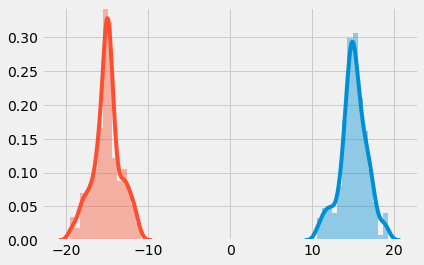

In [150]:
# Generate random data:
X = np.linspace(-5,5,num=200)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
#X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1)).flatten() # Combine the clusters to get the random datapoints from above

sns.distplot(X0)
sns.distplot(X1)
#sns.distplot(X2)
plt.show()

## First EM Iteration:

In [151]:
# Defining a class to store values for each gaussian:

class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma,pi):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma
        self.pi = pi
        
    
    def pdf(self,datapoint):
        """
        Function gausspdf(datapoint):
        Given a "datapoint" related to this gaussian-like distribution with parameters "self.mu" and "self.sigma", 
        returns "p" as the probability.
        """
        z = -(datapoint - self.mu)**2 / (2*self.sigma*self.sigma)
        p = np.exp(z) / (np.sqrt(2 *np.pi*self.sigma*self.sigma))
        return p

In [168]:
###############
#INIT
###############

"""Instantiate the random mu_c"""
k = 2 # for two clusters 
pi = 1/k # gaussian mixture variable
iterations = 3

"""Instantiate the random gaussians with an arbitrary mu_c, arbitrary variance and pi = 0.5"""
gauss_1 = Gaussian(3,1,pi) #norm(loc=-5,scale=5)
gauss_2 = Gaussian(2,1,(1-pi)) #norm(loc=8,scale=3) 

iteration 0

Original fit plot:


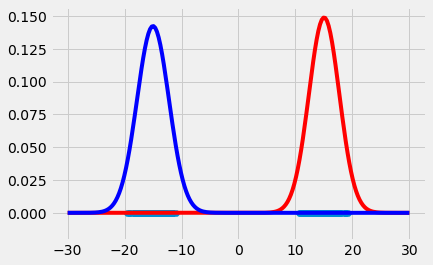

iteration 1
Gauss 1 - old values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - old values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423
###
Gauss 1 - updated values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - updated values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423

fit plot:


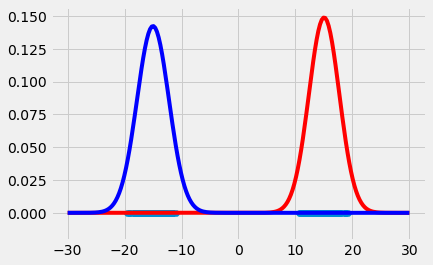

iteration 2
Gauss 1 - old values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - old values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423
###
Gauss 1 - updated values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - updated values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423

fit plot:


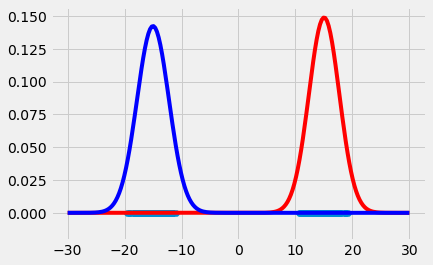

iteration 3
Gauss 1 - old values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - old values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423
###
Gauss 1 - updated values (pi,mu,sigma): 0.5 15.0369950847 2.67901395002
Gauss 2 - updated values (pi,mu,sigma): 0.5 -15.0152882797 2.80177709423

fit plot:


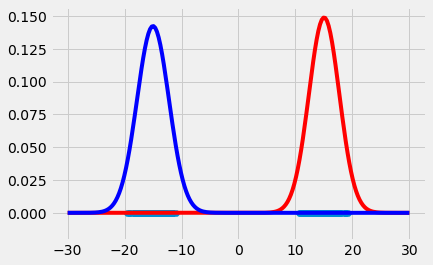

In [171]:
"""Original fit plot"""

print("\nOriginal fit plot:")
dist_1 = norm(loc=gauss_1.mu,scale=gauss_1.sigma).pdf(np.linspace(-30,30,num=200))
dist_2 = norm(loc=gauss_2.mu,scale=gauss_2.sigma).pdf(np.linspace(-30,30,num=200))

plt.scatter(X_tot,np.zeros(len(X_tot)))
plt.plot(np.linspace(-30,30,num=200),dist_1,c="r")
plt.plot(np.linspace(-30,30,num=200),dist_2,c="b")
plt.show()

#### After setup, let's start our routine! #################################################

for i in range(0,iterations):
    print("iteration",i+1)

    """
    E-Step
    """

    """Creating an array r with dimensionality n x K.
    We will store our probabilities for each datapoint (obs) belonging to each gaussian (vars)
    in this array!"""

    r = np.zeros((len(X_tot),2))  

    """
    Probability for each datapoint x_i to belong to each gaussian g * pi mix --> "Weights"
    """

    # generate probabilities:

    r[:,0] = gauss_1.pi*gauss_1.pdf(X_tot)    
    r[:,1] = gauss_2.pi*gauss_2.pdf(X_tot)

    """
    Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
    cluster c
    """
    r[:,0] = r[:,0]/(r[:,0]+r[:,1])
    r[:,1] = 1-r[:,0]

    # compute log likelihood of each weight in each col, then sum:
    # np.log(r[:,0] + r[:,1])



    #######################################################################


    """M-Step""" 
    # Compute new values for mu, sigma and pi, updating our gaussian estimates for the following E-Step

    print("Gauss 1 - old values (pi,mu,sigma):",gauss_1.pi,gauss_1.mu,gauss_1.sigma)
    print("Gauss 2 - old values (pi,mu,sigma):",gauss_2.pi,gauss_2.mu,gauss_2.sigma)
    print("###")

    """calculate m_c""" # -> sum of weights in each cluster
    m_c = [np.sum(r[:,0]),np.sum(r[:,1])]

    """calculate pis"""
    # For each cluster calculate the new pi rate: sum of weights in col 1 / sum of weights in col 1 + col 2
    gauss_1.pi = m_c[0]/np.sum(m_c) 
    gauss_2.pi = 1-gauss_1.pi

    """calculate mus"""
    gauss_1.mu = np.sum((X_tot*r[:,0])/m_c[0]) # Calculating mu1 = sum of (data+weights_1)/sum of weights_1
    gauss_2.mu = np.sum((X_tot*r[:,1])/m_c[1]) # Calculating mu2 = sum of (data+weights_2)/sum of weights_2

    """calculate sigmas"""
    gauss_1.sigma = np.sum([i*(j-gauss_1.mu)*(j-gauss_1.mu) for i,j in zip(r[:,0],X_tot)]) / m_c[0]
    # sigma_1 is the sum of [weight1 * (x-mu)ˆ2] / sum of weights_1
    gauss_2.sigma = np.sum([i*(j-gauss_2.mu)*(j-gauss_2.mu) for i,j in zip(r[:,1],X_tot)]) / m_c[1]
    # sigma_2 is the sum of [weight2 * (x-mu)ˆ2] / sum of weights_2

    print("Gauss 1 - updated values (pi,mu,sigma):",gauss_1.pi,gauss_1.mu,gauss_1.sigma)
    print("Gauss 2 - updated values (pi,mu,sigma):",gauss_2.pi,gauss_2.mu,gauss_2.sigma)

    print("\nfit plot:")
    dist_1 = norm(loc=gauss_1.mu,scale=gauss_1.sigma).pdf(np.linspace(-30,30,num=200))
    dist_2 = norm(loc=gauss_2.mu,scale=gauss_2.sigma).pdf(np.linspace(-30,30,num=200))

    plt.scatter(X_tot,np.zeros(len(X_tot)))
    plt.plot(np.linspace(-30,30,num=200),dist_1,c="r")
    plt.plot(np.linspace(-30,30,num=200),dist_2,c="b")
    plt.show()

## References:
- https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php
- https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html 
- https://www.youtube.com/watch?v=iQoXFmbXRJA&list=PLBv09BD7ez_4e9LtmK626Evn1ion6ynrt&index=2
- https://www.youtube.com/watch?v=JNlEIEwe-Cg
- https://github.com/llSourcell/Gaussian_Mixture_Models
- https://brilliant.org/wiki/gaussian-mixture-model/
- Elements of Statistical Learning